In [48]:
import pandas as pd
import requests
import datetime
import pandasql as ps
import seaborn as sns
import matplotlib.pyplot as plt
import json
from matplotlib.ticker import FuncFormatter

sns.set_theme(style='white')

In [2]:

url = 'https://www.ine.pt/ine/json_indicador/pindica.jsp?op=2&varcd=0002383&Dim1=T&Dim2=PT&Dim3=T&lang=EN'

response = requests.get(url)

raw_data = response.json()

data = raw_data[0]['Dados']

In [3]:
print(json.dumps(data, indent=4))

{
    "January 1948": [
        {
            "geocod": "PT",
            "geodsg": "Portugal",
            "dim_3": "T",
            "dim_3_t": "Total",
            "ind_string": "0,9990",
            "valor": "0.999"
        }
    ],
    "February 1948": [
        {
            "geocod": "PT",
            "geodsg": "Portugal",
            "dim_3": "T",
            "dim_3_t": "Total",
            "ind_string": "0,9987",
            "valor": "0.9987"
        }
    ],
    "March 1948": [
        {
            "geocod": "PT",
            "geodsg": "Portugal",
            "dim_3": "T",
            "dim_3_t": "Total",
            "ind_string": "0,9933",
            "valor": "0.9933"
        }
    ],
    "April 1948": [
        {
            "geocod": "PT",
            "geodsg": "Portugal",
            "dim_3": "T",
            "dim_3_t": "Total",
            "ind_string": "0,9984",
            "valor": "0.9984"
        }
    ],
    "May 1948": [
        {
            "geocod": "PT",
      

In [4]:
parsed_data = [{'consumer_price_index': value[0]['valor'], 'from_date': key} for key, value in data.items()]

df_cpi = pd.DataFrame(parsed_data)

df_cpi['from_date'] = pd.to_datetime(df_cpi['from_date'], format='%B %Y')

df_cpi = df_cpi.sort_values(by='from_date')

df_cpi['to_date'] = df_cpi['from_date'].shift(-1)

tomorrow = datetime.date.today() + datetime.timedelta(days=1)

df_cpi['to_date'] = df_cpi['to_date'].fillna(pd.Timestamp(tomorrow))

df_cpi['consumer_price_index'] = df_cpi['consumer_price_index'].astype(float)

df_cpi

,consumer_price_index,from_date,to_date
0,0.9990,1948-01-01,1948-02-01
1,0.9987,1948-02-01,1948-03-01
2,0.9933,1948-03-01,1948-04-01
3,0.9984,1948-04-01,1948-05-01
4,0.9928,1948-05-01,1948-06-01
...,...,...,...
921,122.2410,2024-10-01,2024-11-01
922,122.0430,2024-11-01,2024-12-01
923,122.1730,2024-12-01,2025-01-01
924,121.6220,2025-01-01,2025-02-01


In [5]:
cpi_202502 = df_cpi.loc[df_cpi['to_date'] == '2025-02-01', 'consumer_price_index'].values[0]

df_cpi['consumer_price_index_202502'] = cpi_202502

df_cpi['adj_mult_factor'] = df_cpi['consumer_price_index_202502'] / df_cpi['consumer_price_index']

df_cpi

,consumer_price_index,from_date,to_date,consumer_price_index_202502,adj_mult_factor
0,0.9990,1948-01-01,1948-02-01,121.622,121.743744
1,0.9987,1948-02-01,1948-03-01,121.622,121.780314
2,0.9933,1948-03-01,1948-04-01,121.622,122.442364
3,0.9984,1948-04-01,1948-05-01,121.622,121.816907
4,0.9928,1948-05-01,1948-06-01,121.622,122.504029
...,...,...,...,...,...
921,122.2410,2024-10-01,2024-11-01,121.622,0.994936
922,122.0430,2024-11-01,2024-12-01,121.622,0.996550
923,122.1730,2024-12-01,2025-01-01,121.622,0.995490
924,121.6220,2025-01-01,2025-02-01,121.622,1.000000


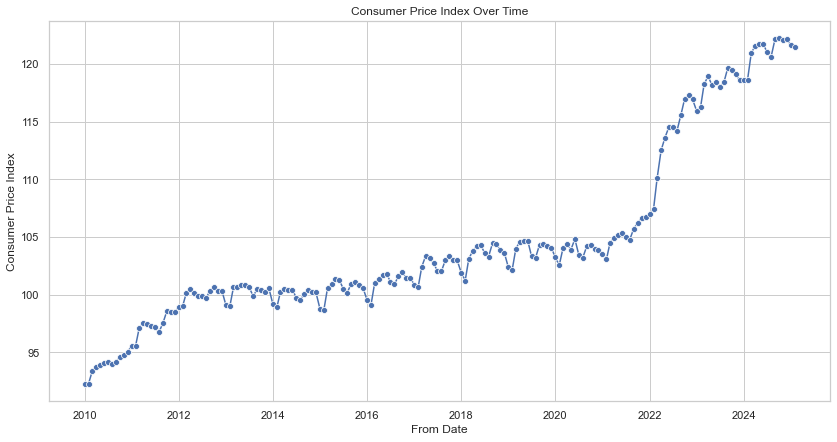

In [6]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_cpi[df_cpi['from_date'] >= '2010-01-01'], x='from_date', y='consumer_price_index', marker='o')
plt.xlabel('From Date')
plt.ylabel('Consumer Price Index')
plt.title('Consumer Price Index Over Time')
plt.show()

In [7]:
df_cpi_adj_factor = df_cpi[['from_date', 'to_date', 'adj_mult_factor']]

df_cpi_adj_factor

,from_date,to_date,adj_mult_factor
0,1948-01-01,1948-02-01,121.743744
1,1948-02-01,1948-03-01,121.780314
2,1948-03-01,1948-04-01,122.442364
3,1948-04-01,1948-05-01,121.816907
4,1948-05-01,1948-06-01,122.504029
...,...,...,...
921,2024-10-01,2024-11-01,0.994936
922,2024-11-01,2024-12-01,0.996550
923,2024-12-01,2025-01-01,0.995490
924,2025-01-01,2025-02-01,1.000000


In [8]:
df_sales = pd.read_csv('../data/sales.csv')

In [9]:
df_sales.groupby('transaction_type').agg(['mean','count','max','min'])

customer_id                        amount_euros          \
                          mean   count       max  min         mean   count   
transaction_type                                                             
purchase          2.197254e+07  611768  36546201    1   154.555456  611768   
return            2.284766e+07   23152  36541501  801  -115.911556   23152   

                                     
                       max      min  
transaction_type                     
purchase          24295.13     0.10  
return               -0.10 -8314.05

In [60]:
query = '''
SELECT
    s.customer_id,
    s.transaction_date,
    s.amount_euros AS amount_euros_current_prices,
    s.amount_euros * cpi.adj_mult_factor AS amount_euros_constant_prices_202502,
    s.transaction_type
FROM df_sales AS s
INNER JOIN df_cpi_adj_factor AS cpi
ON s.transaction_date >= cpi.from_date AND s.transaction_date < cpi.to_date
'''

df_sales_adjusted = ps.sqldf(query, locals())

In [61]:
df_sales_adjusted

,customer_id,transaction_date,amount_euros_current_prices,amount_euros_constant_prices_202502,transaction_type
0,33829301,2016-06-10,99.99,119.449005,purchase
1,26742901,2015-01-17,14.28,17.580522,purchase
2,25929501,2015-04-06,88.45,106.607727,purchase
3,27012101,2015-04-10,24.99,30.120148,purchase
4,5362901,2015-05-17,199.89,239.902716,purchase
...,...,...,...,...,...
634915,33939201,2024-09-06,72.00,71.681734,purchase
634916,528301,2024-10-10,123.47,122.844777,purchase
634917,36224401,2025-01-02,29.80,29.800000,purchase
634918,34849601,2025-01-02,34.99,34.990000,purchase


In [62]:
df_sales_adjusted.groupby('transaction_type').agg(['mean','count','max','min'])

customer_id                         \
                          mean   count       max  min   
transaction_type                                        
purchase          2.197254e+07  611768  36546201    1   
return            2.284766e+07   23152  36541501  801   

                 amount_euros_current_prices                             \
                                        mean   count       max      min   
transaction_type                                                          
purchase                          154.555456  611768  24295.13     0.10   
return                           -115.911556   23152     -0.10 -8314.05   

                 amount_euros_constant_prices_202502                        \
                                                mean   count           max   
transaction_type                                                             
purchase                                  173.257132  611768  25257.050183   
return                                   -128.850995   23152     -0.113981   

                               
                          min  
transaction_type               
purchase             0.099549  
return           -9795.324897

In [18]:
df_sales_adjusted.to_csv('../data/sales_constant_prices_202502.csv', index=False)

In [69]:
df_sales_adj_grouped = df_sales_adjusted.copy()

df_sales_adj_grouped['transaction_month'] = pd.to_datetime(df_sales_adj_grouped['transaction_date']).dt.to_period('M').dt.to_timestamp()

df_sales_adj_grouped = df_sales_adj_grouped.groupby(['transaction_month']).\
    agg({'amount_euros_current_prices': 'sum', 'amount_euros_constant_prices_202502': 'sum'})

df_sales_adj_grouped.rename(columns={'amount_euros_current_prices': 'Current Prices',
                                     'amount_euros_constant_prices_202502': 'Constant Prices, Feb 2025'}, inplace=True)

df_sales_adj_grouped = df_sales_adj_grouped.\
    reset_index().\
    melt(id_vars='transaction_month', var_name='amount_type', value_name='amount_euros').\
    sort_values(by='transaction_month')

df_sales_adj_grouped


,transaction_month,amount_type,amount_euros
0,2015-01-01,Current Prices,4.526916e+05
123,2015-01-01,"Constant Prices, Feb 2025",5.573145e+05
1,2015-02-01,Current Prices,3.358070e+05
124,2015-02-01,"Constant Prices, Feb 2025",4.137027e+05
2,2015-03-01,Current Prices,3.539177e+05
...,...,...,...
120,2025-01-01,Current Prices,1.048797e+06
244,2025-02-01,"Constant Prices, Feb 2025",8.533006e+05
121,2025-02-01,Current Prices,8.524347e+05
122,2025-03-01,Current Prices,6.638299e+05


In [ ]:
legend.set_texts(['Current Prices', 'Constant Prices (Feb 2025)'])

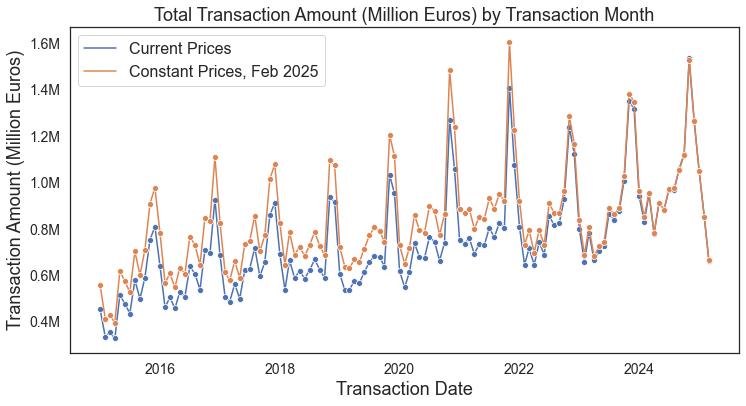

In [71]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_sales_adj_grouped, x='transaction_month', y='amount_euros', hue='amount_type', marker='o')
formatter = FuncFormatter(lambda x, _: f'{x / 1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel('Transaction Date', fontsize=18)
plt.ylabel('Transaction Amount (Million Euros)', fontsize=18)
plt.title('Total Transaction Amount (Million Euros) by Transaction Month', fontsize=18)
plt.legend(title=None, fontsize=16, title_fontsize=16)
#plt.legend.set_labels(['Current Prices', 'Constant Prices, Feb 2025'])
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.legend.set_texts(['Current Prices', 'Constant Prices (Feb 2025)']) 
plt.show()

In [72]:
df_adj = df_sales_adj_grouped.loc[df_sales_adj_grouped['amount_type'] == 'Constant Prices, Feb 2025',['transaction_month', 'amount_euros']]

df_unadj = df_sales_adj_grouped.loc[df_sales_adj_grouped['amount_type'] == 'Current Prices',['transaction_month', 'amount_euros']]

df_joined = df_unadj.join(df_adj.set_index('transaction_month'), on='transaction_month', lsuffix='_current', rsuffix='_constant_202502')


In [73]:
df_joined['pct_difference'] = (df_joined['amount_euros_constant_202502'] - df_joined['amount_euros_current']) / df_joined['amount_euros_current']

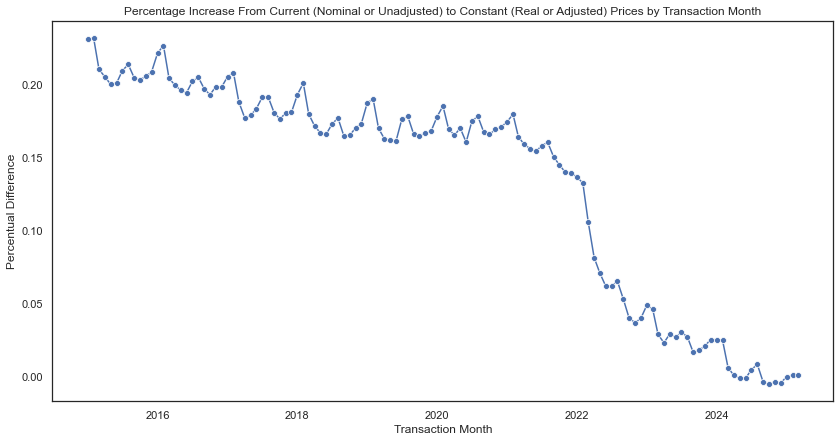

In [74]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_joined, x='transaction_month', y='pct_difference', marker='o')
plt.xlabel('Transaction Month')
plt.ylabel('Percentual Difference')
plt.title('Percentage Increase From Current (Nominal or Unadjusted) to Constant (Real or Adjusted) Prices by Transaction Month')
plt.show()